In [ ]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("data.xlsx")
y = data['Estado al egreso']
X = data.drop('Estado al egreso', axis = 1)

In [3]:
X.drop(['Nombre y apellidos', 'App Vasculitis', 'App Colagenopatías'], axis=1, inplace=True)

c:\Users\amiro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amiro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amiro\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amiro\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(

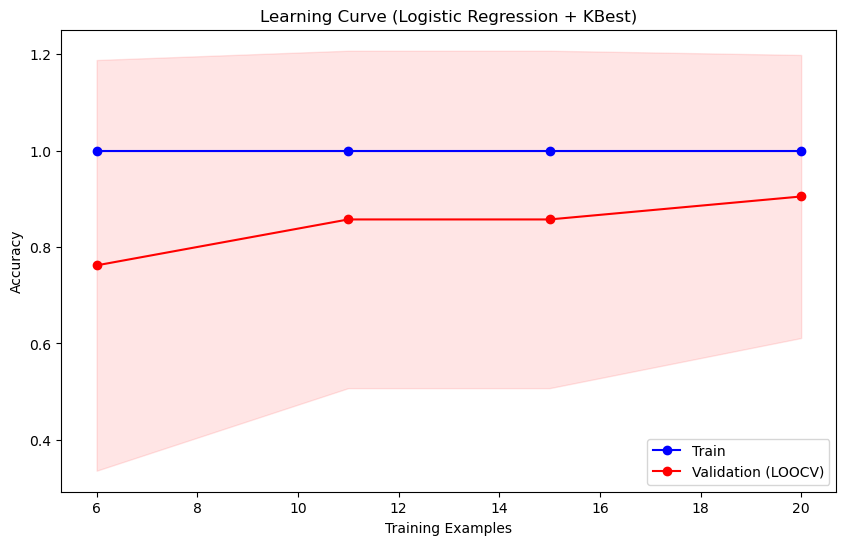

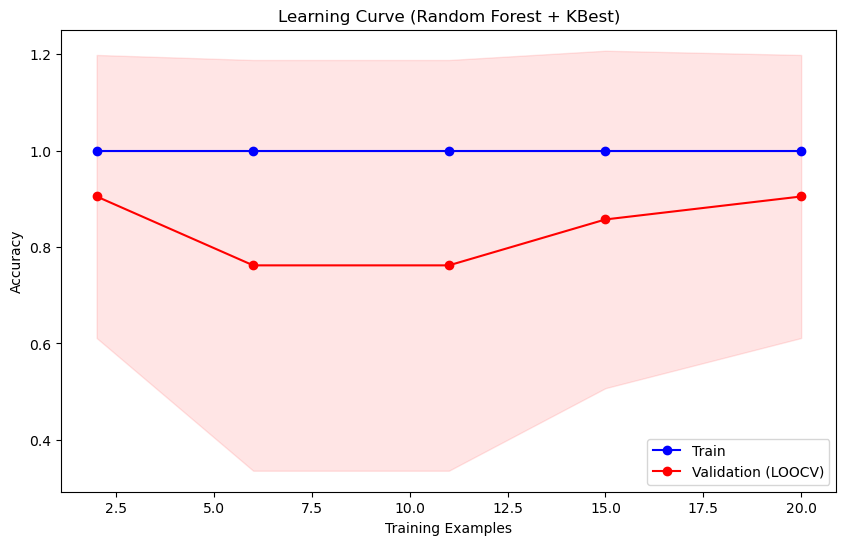

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=LeaveOneOut(), 
        scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train')
    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation (LOOCV)')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

model1 = Pipeline([
    ('selector', SelectKBest(score_func=chi2, k=5)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model2 = Pipeline([
        ('selector', SelectKBest(score_func=chi2, k=5)),
        ('model', RandomForestClassifier(n_estimators=100))
    ])

plot_learning_curve(model1, X, y, "Learning Curve (Logistic Regression + KBest)")
plot_learning_curve(model2, X, y, "Learning Curve (Random Forest + KBest)")